In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel

#from our utils python file
from utils import preprocess_credit_card_data

#data loaded from local path

df_full = pd.read_csv(
    r'/Users/tylersong/Desktop/school/ML/ML-Final-Project/UCI_Credit_Card.csv'
)

# 2) choose 1,000 random indices
sample_idx = df_full.sample(n=1000, random_state=42).index

# 3) build df from those indices, reset its index to 0…999
df = df_full.loc[sample_idx].reset_index(drop=True)

# 4) drop those same indices from df_full, then sample 250 from what's left
test_df = (
    df_full
    .drop(sample_idx)
    .sample(n=250, random_state=42)
    .reset_index(drop=True)
)

print ("df shape: ", df.shape)
print ("df head: ", df.head())
print("test_df shape: ", test_df.shape)
print("test_df head: ", test_df.head())


#insepcting columns that are categorical (to be later transformed)
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

#Loop through each and print value counts
for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())



df shape:  (1000, 25)
df head:        ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   2309    30000.0    1          2         2   25      0      0      0   
1  22405   150000.0    2          1         2   26      0      0      0   
2  23398    70000.0    2          3         1   32      0      0      0   
3  25059   130000.0    1          3         2   49      0      0      0   
4   2665    50000.0    2          2         2   36      0      0      0   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...    12580.0    13716.0    14828.0    1500.0    2000.0    1500.0   
1      0  ...   101581.0    77741.0    77264.0    4486.0    4235.0    3161.0   
2      0  ...    69753.0    70111.0    70212.0    2431.0    3112.0    3000.0   
3      0  ...    16898.0    11236.0     6944.0    1610.0    1808.0    7014.0   
4      0  ...    19574.0    20295.0    19439.0    2000.0    1500.0    1000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def

In [41]:
#Preprocessing the data

df = preprocess_credit_card_data(df)
test_df = preprocess_credit_card_data(test_df)
print(df.head())

   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0    30000.0   25      0      0      0      0      0      0     8864.0   
1   150000.0   26      0      0      0      0      0      0   136736.0   
2    70000.0   32      0      0      0      0      0      0    70122.0   
3   130000.0   49      0      0      0      0      0     -1    20678.0   
4    50000.0   36      0      0      0      0      0      2    94228.0   

   BILL_AMT2  ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    10062.0  ...      0            0            1            0            0   
1   125651.0  ...      1            1            0            0            0   
2    69080.0  ...      1            0            0            1            0   
3    18956.0  ...      0            0            0            1            0   
4    47635.0  ...      1            0            1            0            0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0       

In [42]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']
X_test = test_df.drop(columns=['default.payment.next.month'])
y_test = test_df['default.payment.next.month']
print("Distribution of y:")
print(y.value_counts())


Distribution of y:
default.payment.next.month
0    761
1    236
Name: count, dtype: int64


In [57]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("X train", X_train)
print("X validation", X_validation)
print("Y train", y_train)
print("Y validation", y_validation)
print("Distribution of y_train:")  
print(y_train.value_counts())


X train      LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
421    50000.0   52      0      0      0      0      0      0    49854.0   
935    20000.0   51      0      0      0      0      2      2    14341.0   
520   320000.0   32      0      0      0     -1     -1     -1    13720.0   
464    30000.0   25      1      2      2      2      2      2    26623.0   
2      70000.0   32      0      0      0      0      0      0    70122.0   
..         ...  ...    ...    ...    ...    ...    ...    ...        ...   
107   210000.0   32      0      0      2      0      0      0   155913.0   
271   500000.0   32     -1     -1     -1     -1      0     -1    10339.0   
863   120000.0   23      0      0      0      0      0      0   115653.0   
437   260000.0   28      0      0      0      0      0      0   234867.0   
103   410000.0   45     -2     -2     -2     -2     -2     -2      597.0   

     BILL_AMT2  ...  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  \
421    512

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


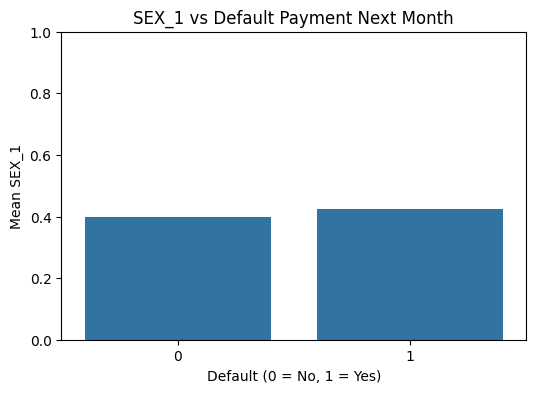

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


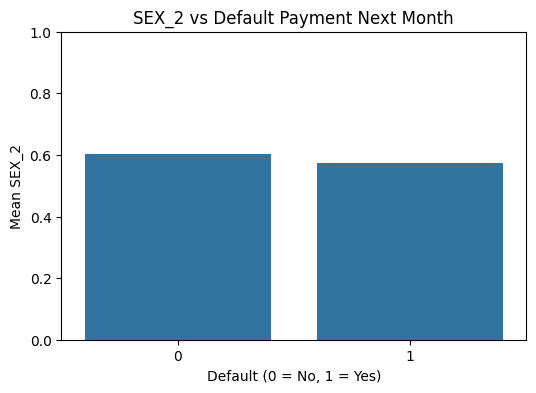

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


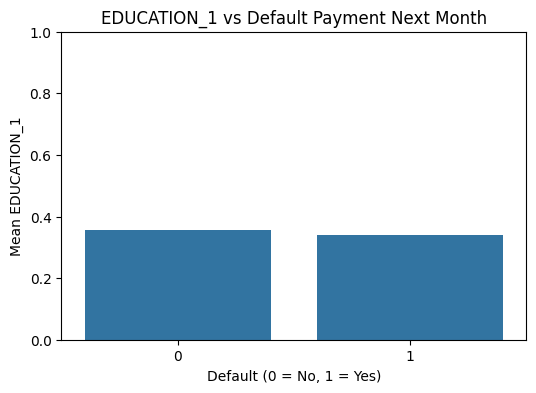

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


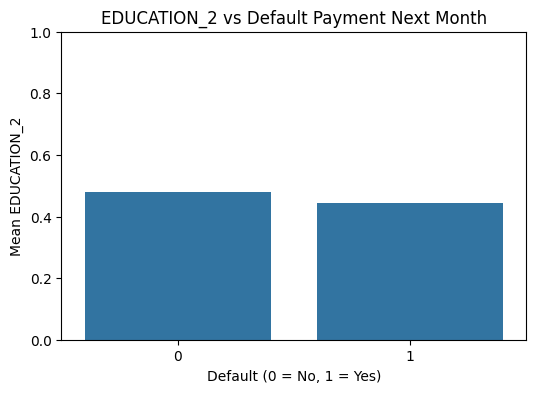

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


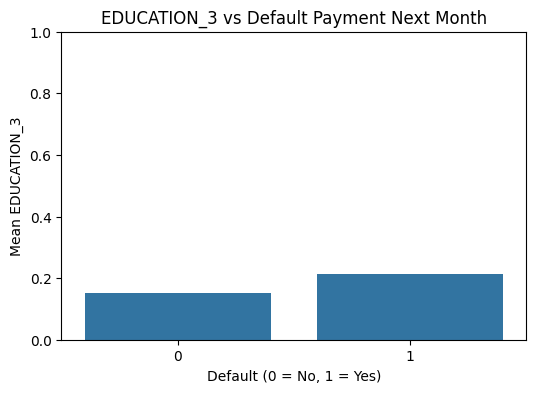

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


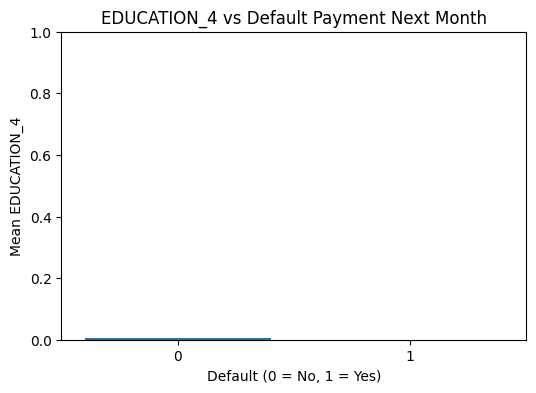

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


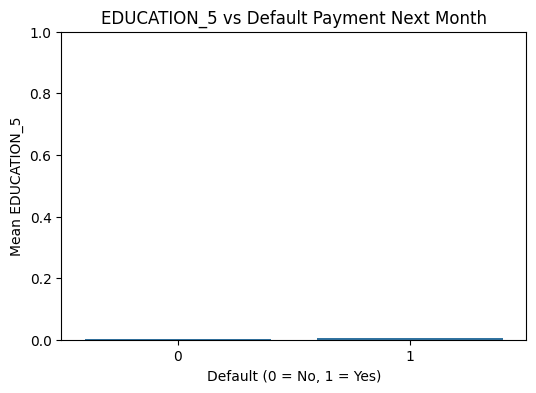

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


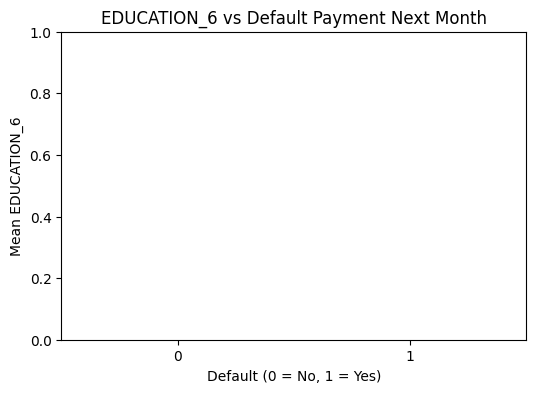

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


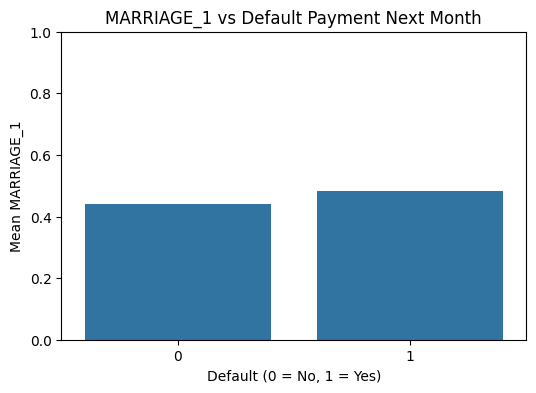

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


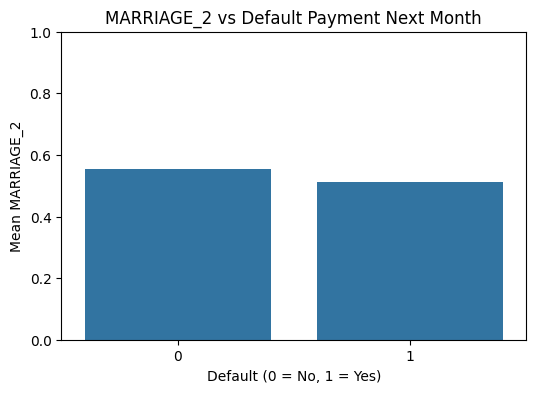

/var/folders/ss/4d6r1qn954dch_yq8dq36s8c0000gn/T/ipykernel_20443/755231588.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y_train, y=X_train[col], ci=None)


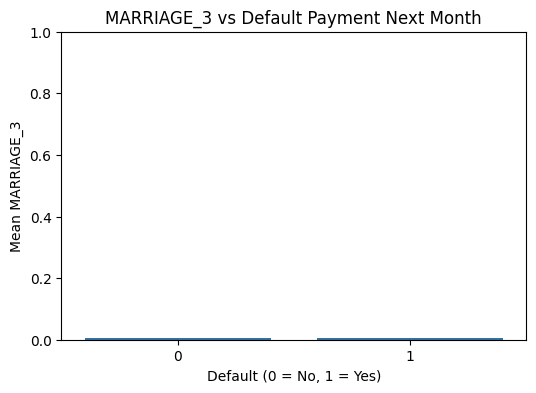

In [44]:
dummy_cols = [col for col in X_train.columns if col.startswith(('SEX_', 'EDUCATION_', 'MARRIAGE_'))]

#Plot default rates for each dummy column
for col in dummy_cols:
    plt.figure(figsize=(6, 4))
    
    #Calculate the mean of the dummy feature grouped by default outcome
    sns.barplot(x=y_train, y=X_train[col], ci=None)
    
    plt.title(f'{col} vs Default Payment Next Month')
    plt.xlabel('Default (0 = No, 1 = Yes)')
    plt.ylabel(f'Mean {col}')
    plt.ylim(0, 1)  #Since dummies are 0 or 1
    plt.show()



In [45]:

# Loop through EDUCATION dummy columns and count 0s and 1s
for i in range(1, 3):
    col = f'SEX_{i}'
    if col in X_train.columns:  # check just in case
        counts = X_train[col].value_counts()
        print(f"Counts for {col}:")
        print(counts)
        print()

# Loop through EDUCATION dummy columns and count 0s and 1s
for i in range(1, 4):
    col = f'MARRIAGE_{i}'
    if col in X_train.columns:  # check just in case
        counts = X_train[col].value_counts()
        print(f"Counts for {col}:")
        print(counts)
        print()


# Loop through EDUCATION dummy columns and count 0s and 1s
for i in range(1, 7):
    col = f'EDUCATION_{i}'
    if col in X_train.columns:  # check just in case
        counts = X_train[col].value_counts()
        print(f"Counts for {col}:")
        print(counts)
        print()



Counts for SEX_1:
SEX_1
0    445
1    302
Name: count, dtype: int64

Counts for SEX_2:
SEX_2
1    445
0    302
Name: count, dtype: int64

Counts for MARRIAGE_1:
MARRIAGE_1
0    411
1    336
Name: count, dtype: int64

Counts for MARRIAGE_2:
MARRIAGE_2
1    406
0    341
Name: count, dtype: int64

Counts for MARRIAGE_3:
MARRIAGE_3
0    742
1      5
Name: count, dtype: int64

Counts for EDUCATION_1:
EDUCATION_1
0    483
1    264
Name: count, dtype: int64

Counts for EDUCATION_2:
EDUCATION_2
0    395
1    352
Name: count, dtype: int64

Counts for EDUCATION_3:
EDUCATION_3
0    623
1    124
Name: count, dtype: int64

Counts for EDUCATION_4:
EDUCATION_4
0    743
1      4
Name: count, dtype: int64

Counts for EDUCATION_5:
EDUCATION_5
0    744
1      3
Name: count, dtype: int64

Counts for EDUCATION_6:
EDUCATION_6
0    747
Name: count, dtype: int64



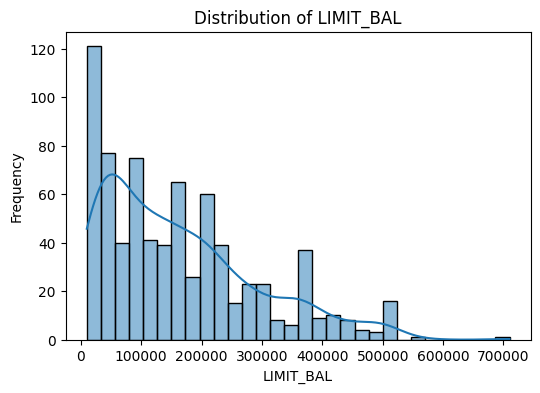

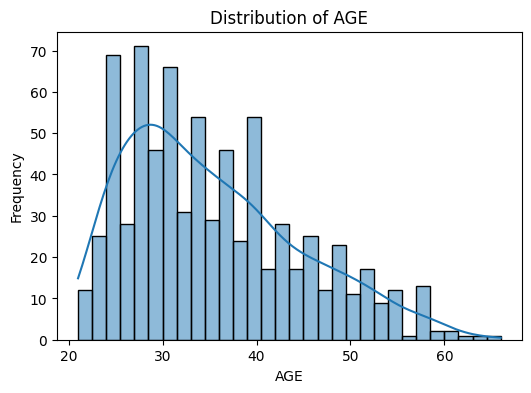

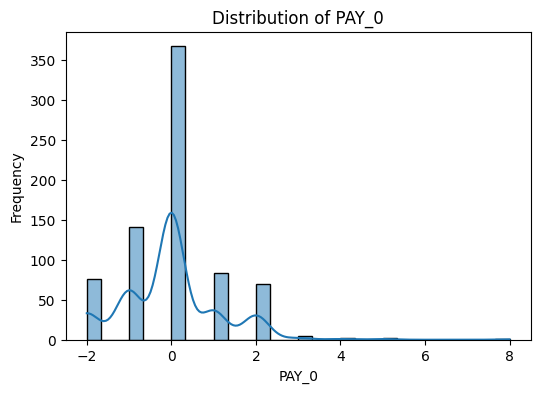

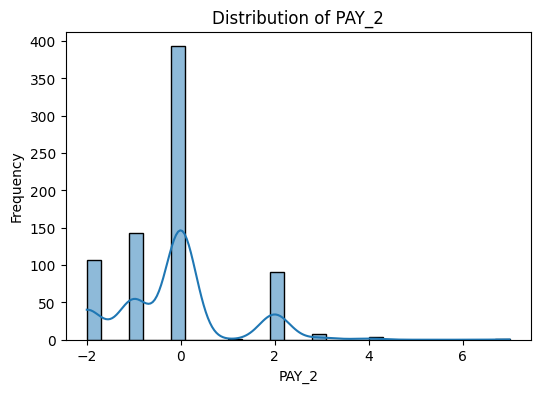

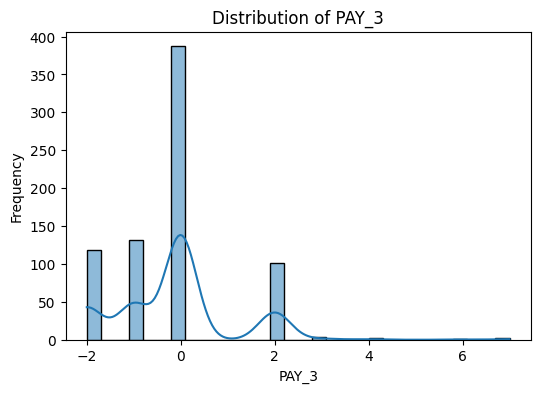

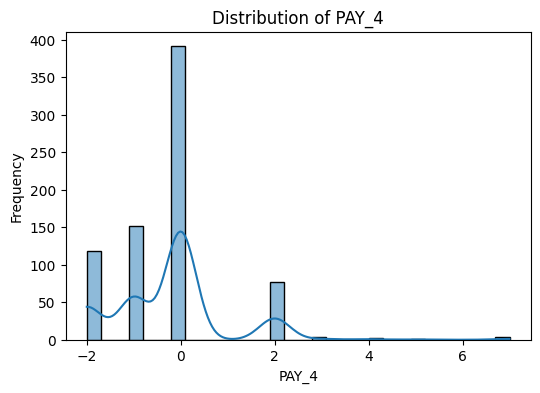

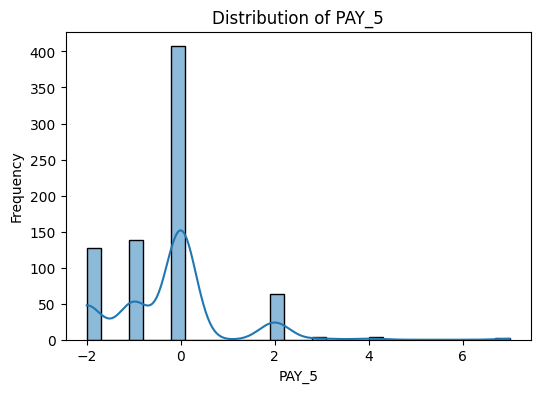

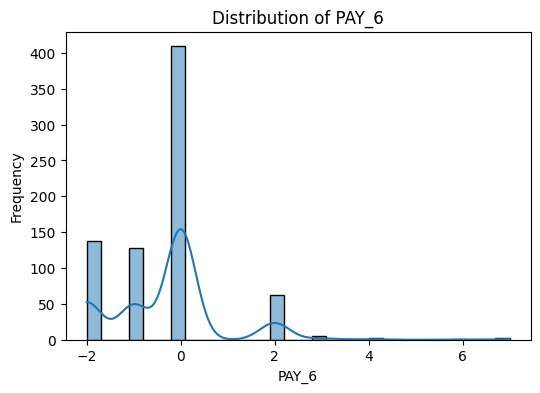

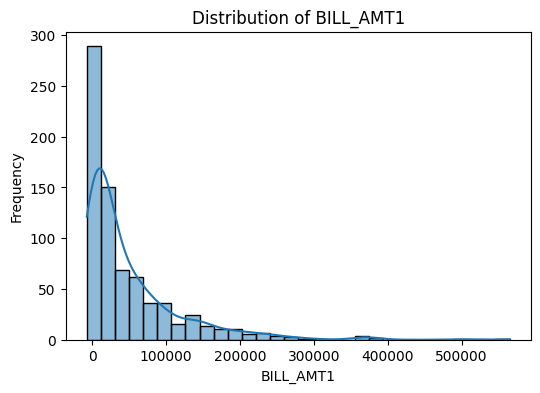

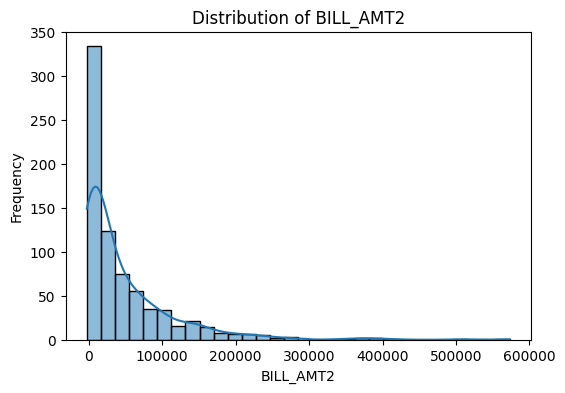

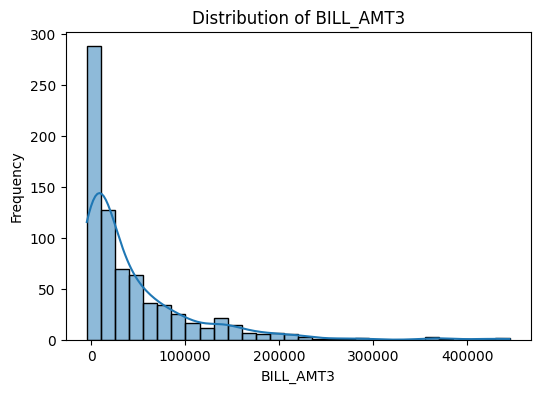

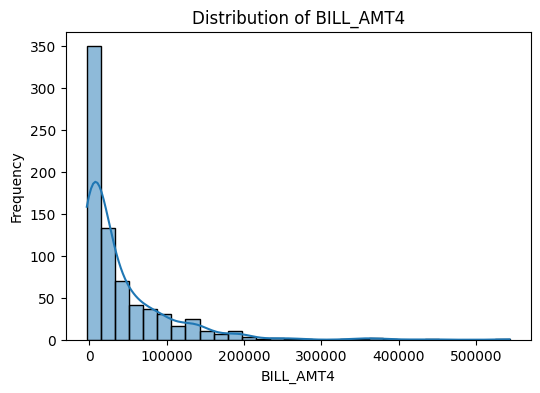

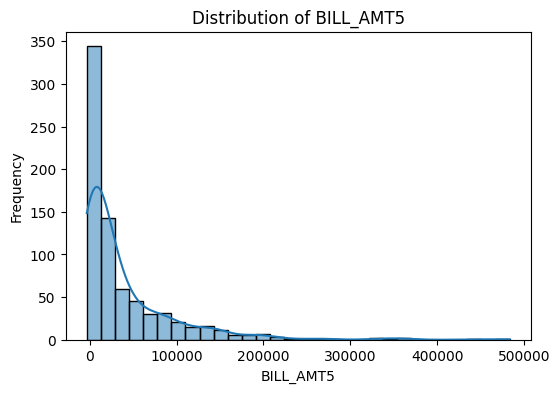

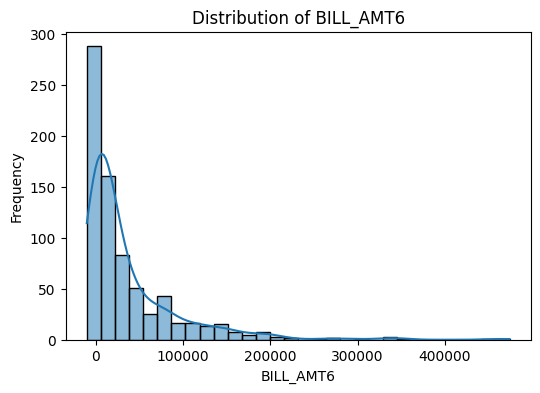

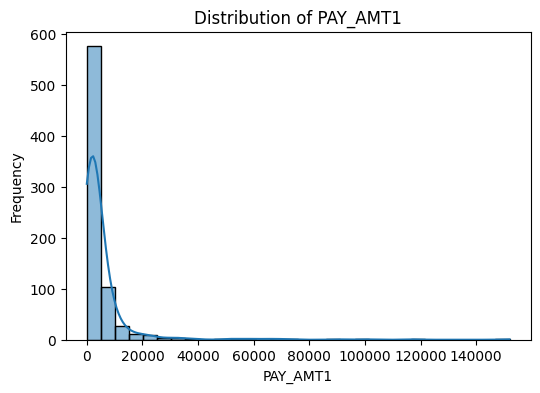

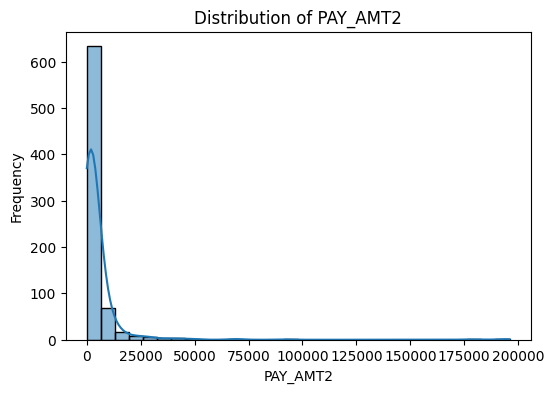

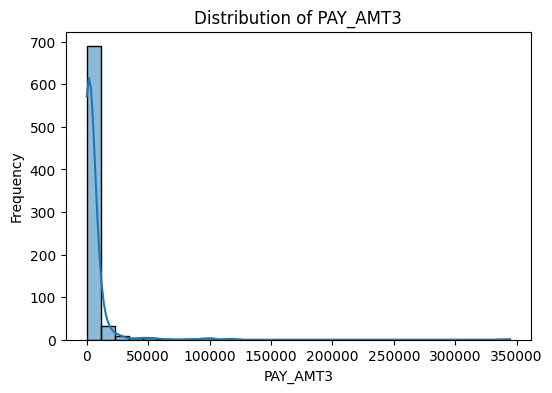

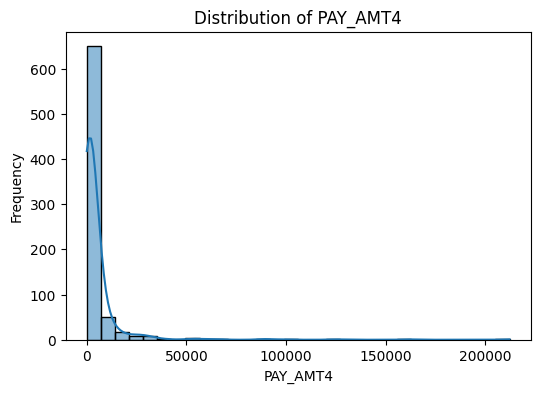

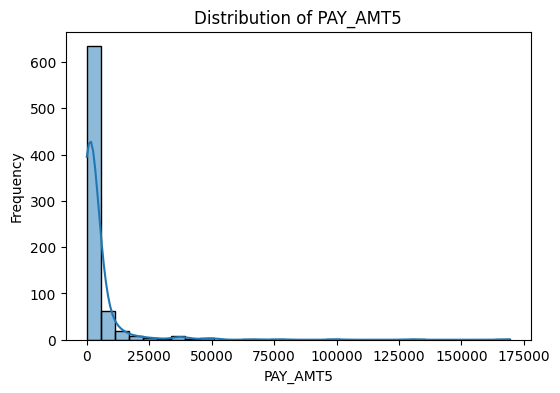

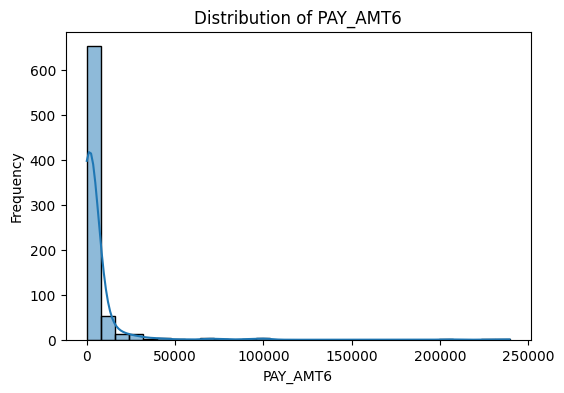

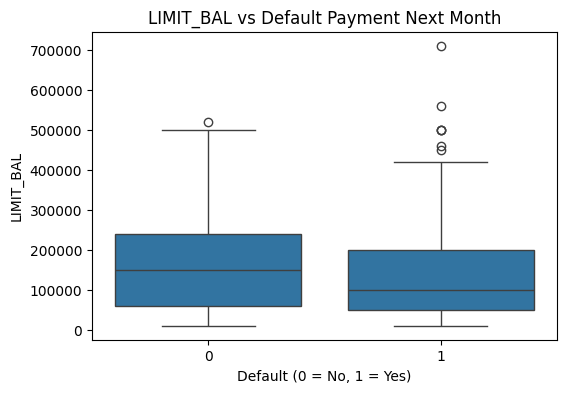

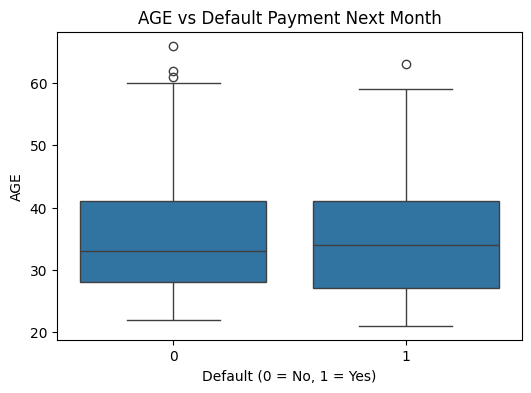

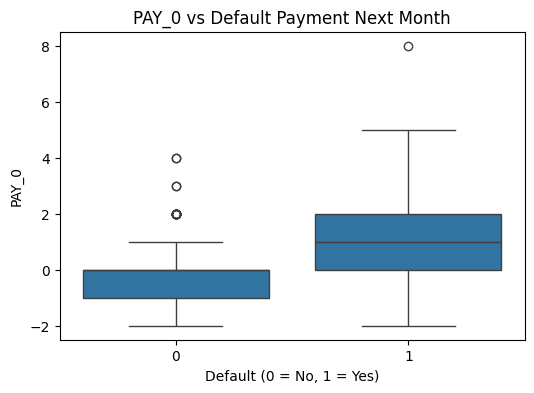

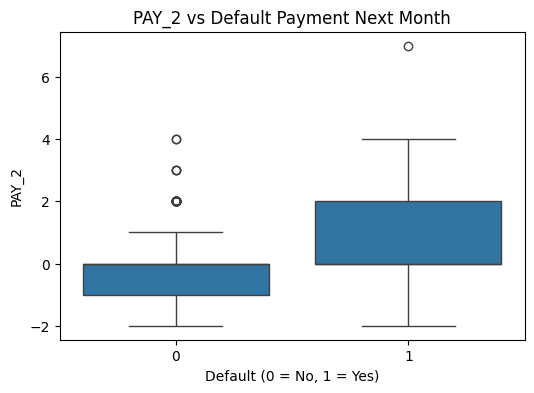

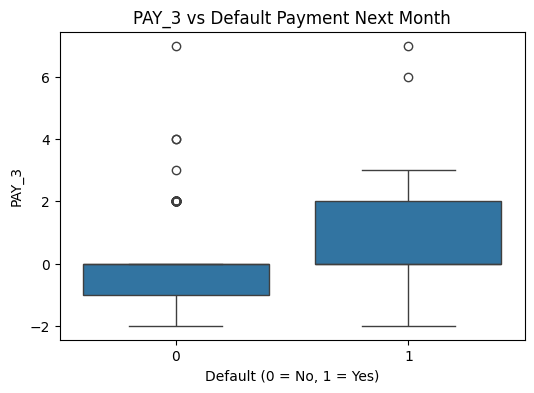

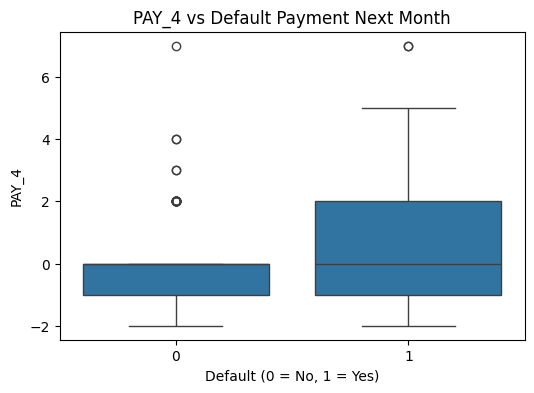

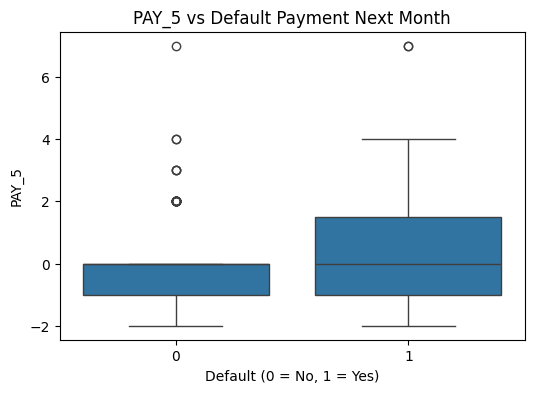

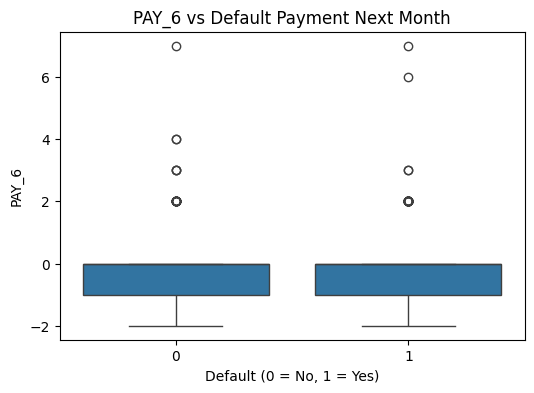

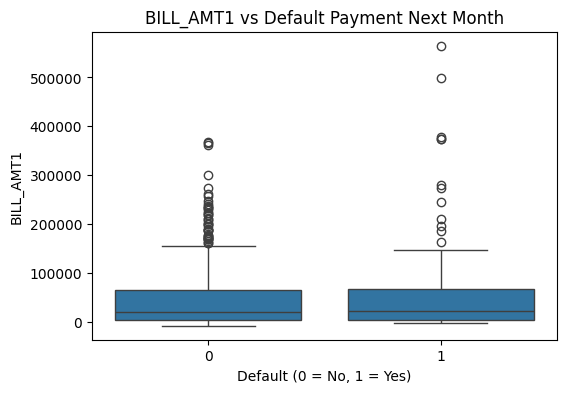

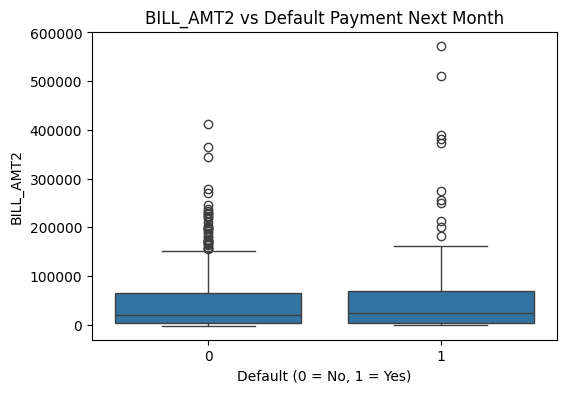

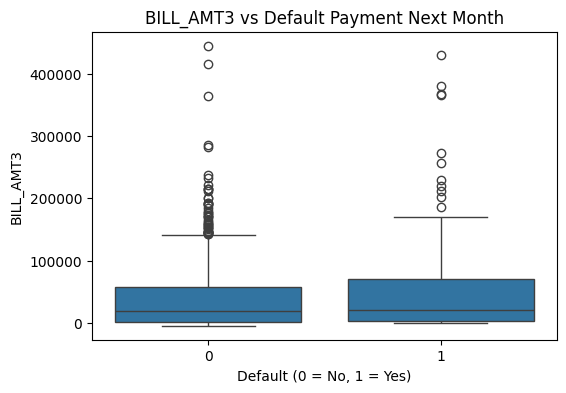

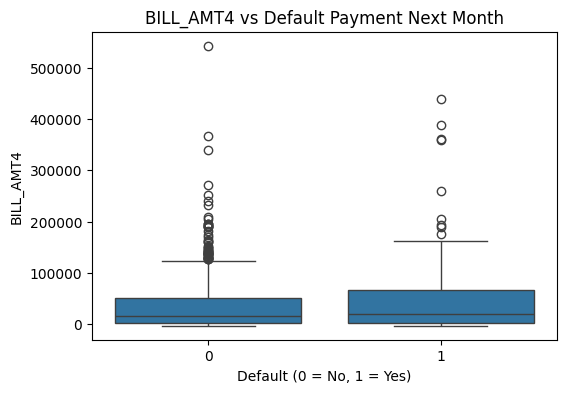

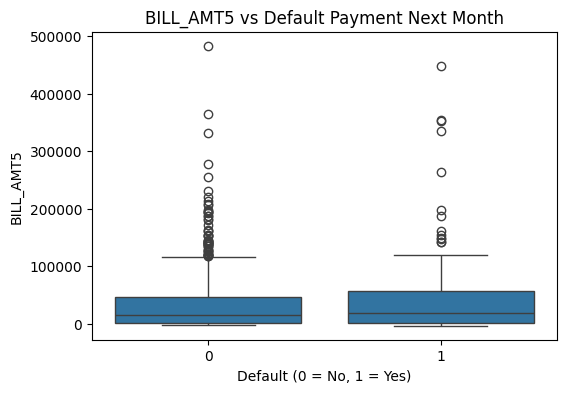

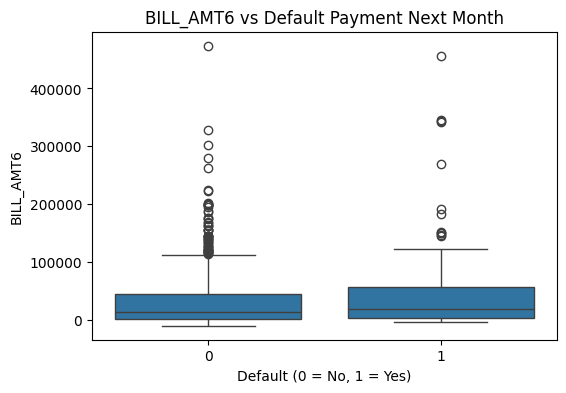

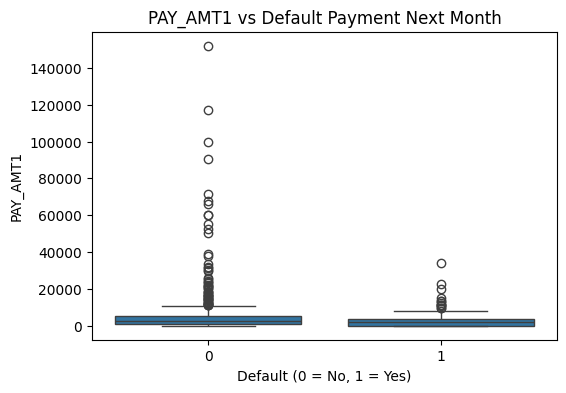

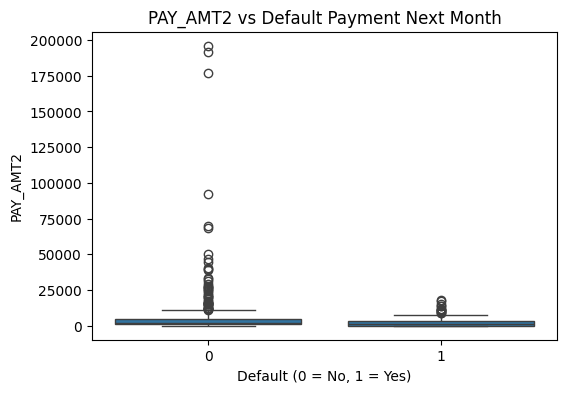

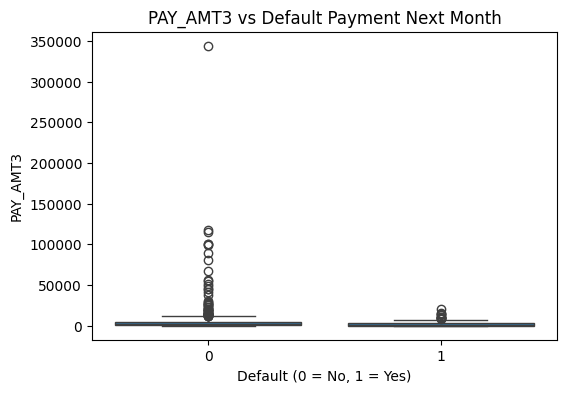

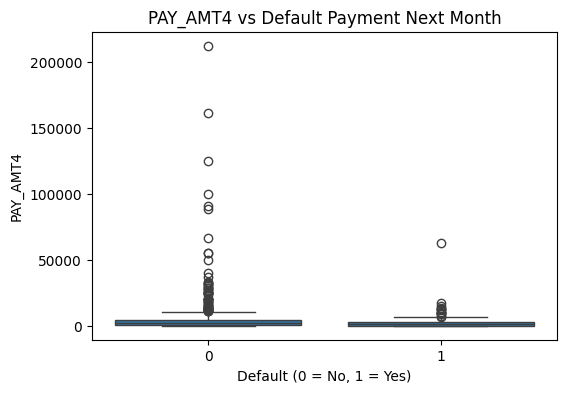

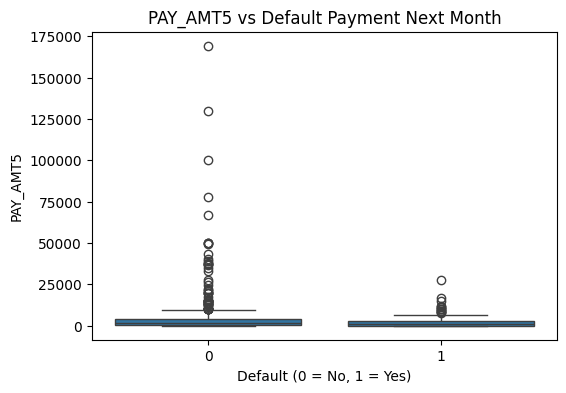

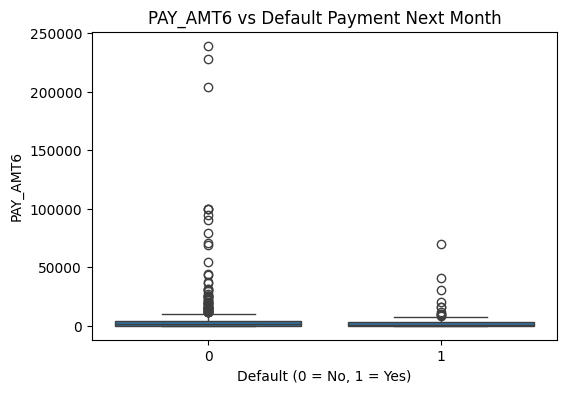

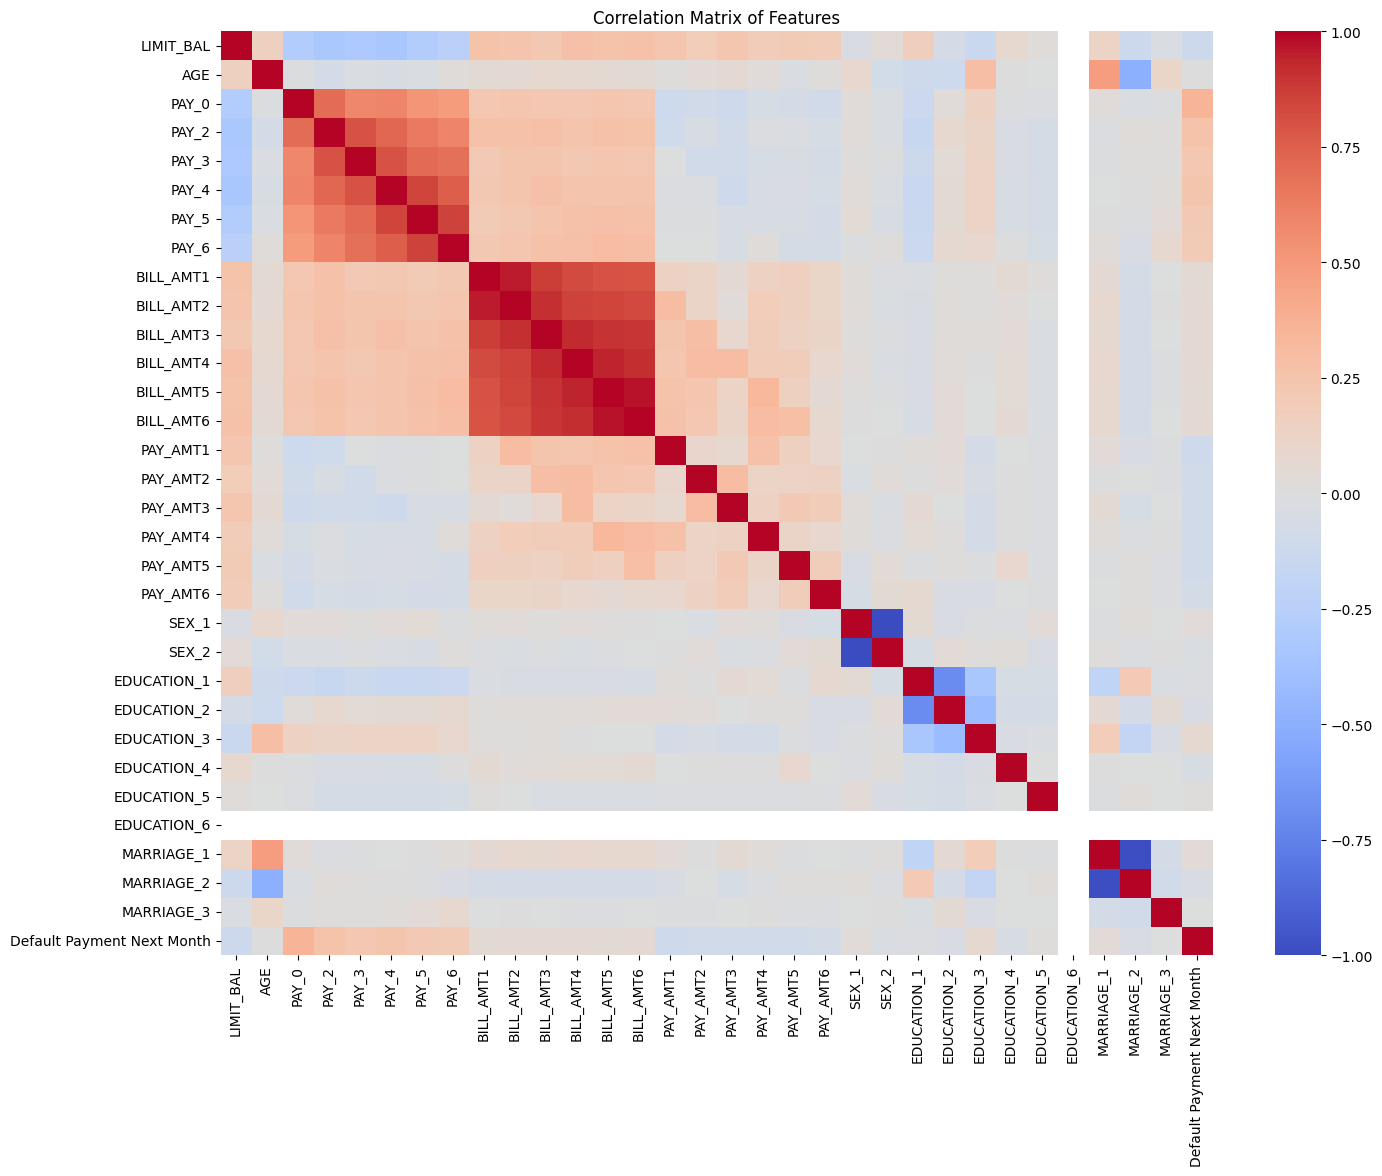

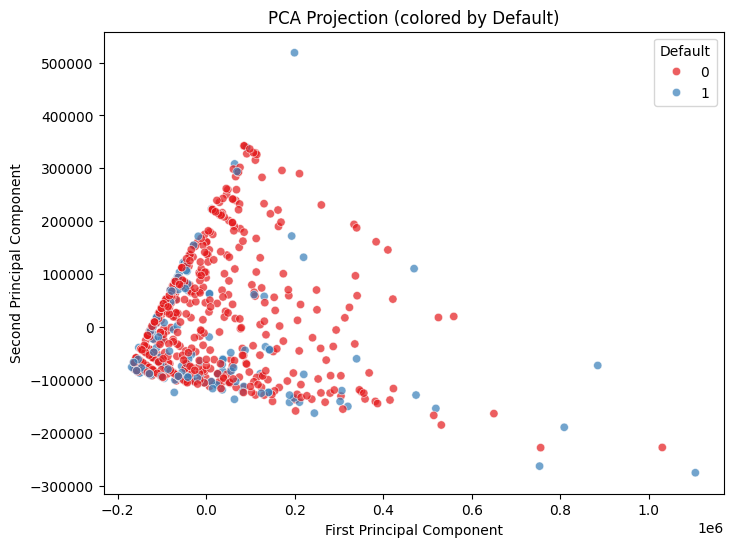

In [ ]:
# List of discrete features
discrete_cols = ['SEX', 'EDUCATION', 'MARRIAGE']


#print feature distributions
for col in X_train.columns:
    if col not in dummy_cols: 
        plt.figure(figsize=(6, 4))
        
        if col in discrete_cols:
            sns.histplot(X_train[col], bins=len(X_train[col].unique()), discrete=True)
        else:
            sns.histplot(X_train[col], kde=True, bins=30)
            
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


#feature vs target visualization
for col in X_train.columns:
    if col not in dummy_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=y_train, y=X_train[col])
        plt.title(f'{col} vs Default Payment Next Month')
        plt.xlabel('Default (0 = No, 1 = Yes)')
        plt.ylabel(col)
        plt.show()

#Correlation matrix
plt.figure(figsize=(16, 12))
df_corr = X_train.copy()
df_corr['Default Payment Next Month'] = y_train
corr = df_corr.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()


#PCA analysis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1', alpha=0.7)
plt.title('PCA Projection (colored by Default)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Default')
plt.show()

In [47]:
#Interesting features of the dataset
#1) The balances seem to exponentially decay which makes sense given that many people likely owe a little amount while only a few owe a large amount
#2) The Pay graphs for Pay_2, Pay3, Pay_4, Pay_5, Pay_6 all have very low data values of 1. This suggests that the many people are able to pay on time or fall behind quickly. They rarely forget to pay by just a month. 
#3) Their is a strong correlation between number the Pay graphs and default rates and this makes sense because fundamentally because as a perso n accumulates credit card debt the likelihood they default goes up.


In [ ]:
def merge_and_drop(df_):

    #determine if EDUCATION_4, EDUCATION_5, EDUCATION_6 are present
    edu_cols = [c for c in ['EDUCATION_4','EDUCATION_5','EDUCATION_6']
                if c in df_.columns]
    
    #merge whatever is there into EDUCATION_4_to_6
    if edu_cols:
        df_['EDUCATION_4_to_6'] = (
            df_[edu_cols]
            .any(axis=1)
            .astype(int)
        )
    else:
        # if none of those columns exist, everything is 0
        df_['EDUCATION_4_to_6'] = 0

    #drop olds columns if they exist
    to_drop = edu_cols + (['MARRIAGE_3'] if 'MARRIAGE_3' in df_.columns else [])
    df_.drop(columns=to_drop, inplace=True)

    #double check dummy cols are ints
    dummy_cols = [c for c in df_.columns
                  if any(pfx in c for pfx in ['SEX_','EDUCATION_','MARRIAGE_'])]
    df_[dummy_cols] = df_[dummy_cols].astype(int)


merge_and_drop(X_train)
merge_and_drop(X_validation)
merge_and_drop(X_test)

# Check the shapes of the datatsets, check if education was properly processed
print(X_train.shape, X_validation.shape, X_test.shape)
print(X_train.filter(like='EDUCATION').head())


(747, 28) (250, 28) (250, 28)
     EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4_to_6
421            0            1            0                 0
935            0            0            1                 0
520            1            0            0                 0
464            0            1            0                 0
2              0            0            1                 0


In [50]:
#Feature Scaling & Transformation

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)


# y_2d_train = np.array(y_train).reshape(-1, 1)
# y_2d_validation = np.array(y_validation).reshape(-1, 1)
# y_2d_test = np.arrary(y_validation).reshape(-1, 1)


In [55]:
#Double check scaled and transformed data
print('X_train.shape: ', X_train.shape)


X_train.shape:  (747, 28)


In [56]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)
y_train = pd.DataFrame(y_train)
y_validation = pd.DataFrame(y_validation)
X_test =pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

#Save csv's
X_train.to_csv('X_train.csv', index=False)
X_validation.to_csv('X_validation.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_validation.to_csv('y_validation.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


print(X_train)
print(X_validation)
print(y_train)
print(y_validation)


           0         1         2         3         4         5         6   \
0   -0.884716  1.818635  0.033589  0.144110  0.134621  0.209362  0.238583   
1   -1.121112  1.710005  0.033589  0.144110  0.134621  0.209362  1.896458   
2    1.242843 -0.353955  0.033589  0.144110  0.134621 -0.609453 -0.590354   
3   -1.042313 -1.114361  0.898801  1.800266  1.718274  1.846993  1.896458   
4   -0.727119 -0.353955  0.033589  0.144110  0.134621  0.209362  0.238583   
..        ...       ...       ...       ...       ...       ...       ...   
742  0.376060 -0.353955  0.033589  0.144110  1.718274  0.209362  0.238583   
743  2.661216 -0.353955 -0.831623 -0.683968 -0.657205 -0.609453  0.238583   
744 -0.333127 -1.331620  0.033589  0.144110  0.134621  0.209362  0.238583   
745  0.770052 -0.788473  0.033589  0.144110  0.134621  0.209362  0.238583   
746  1.952030  1.058229 -1.696834 -1.512046 -1.449032 -1.428268 -1.419292   

           7         8         9   ...        18        19        20  \
0  

In [ ]:
print(test_df.head())

Wrote test_df to test_df.pkl
   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   100000.0   43      1     -2     -2     -2     -1      0        0.0   
1   290000.0   38      0      0      0      0      0      0   118801.0   
2   110000.0   48      0      0      0      0      0      0    92806.0   
3   170000.0   44      0      0      0      0      0     -1   150692.0   
4   120000.0   59      2      2      2      2      2      2    82172.0   

   BILL_AMT2  ...  SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  \
0        0.0  ...      1      0            0            1            0   
1    99370.0  ...      1      0            0            1            0   
2    91217.0  ...      1      0            0            1            0   
3   152861.0  ...      0      1            0            0            1   
4    80266.0  ...      0      1            0            1            0   

   EDUCATION_4  EDUCATION_5  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0            0 